<a href="https://colab.research.google.com/github/akashgaurav1997/Online-Customer-Segmentation/blob/main/ML_Case_Study_of_Online_Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name:** Online Retail Customer Segmentation.#

#**Project Summary:**
* This is a customer segmentation machine learning project on an online retail customer dataset.
* We have imported all the necessary libraries for this project.
* We have mounted the drive.
* We have loaded the dataset and converted it into a pandas dataframe.
* We have taken a glance at the dataframe.
* The dataframe contains 541,909 rows and 8 columns.
* We have handled all the missing values in the dataset and performed all the necessary exploratory data analysis (EDA).
* We have addressed all the outliers in the dataset.
* We have used the elbow method to determine the optimal value of k for k-means clustering.
* We have created clusters using k-means clustering.
* We have visualized the relationships between necessary clusters and columns using scatterplots.
* We have visualized the relevant insights using bar graphs.
* We have compiled a list of all the important observations and conclusions.

In [398]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [399]:
#Importing drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [400]:
#Loading dataset:
df = pd.read_excel('/content/drive/MyDrive/weekyly_dayfolder/Online Retail Dataset for Mid-Course ML Assignment.xlsx')


In [401]:
#Printing dataset:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [402]:
# Finding all the columns:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [403]:
# Finding non-null count in all the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


*We can see there is some missing values in customerid, we cannot impute customerid by mean, median or other imputation method, so we need to handle it by dropping those rows.*

In [404]:
#Finding count of missing values:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [405]:
# Creating a dictionary mapping invoice numbers to customer IDs:
invoice_to_customer = df.dropna(subset=['CustomerID']).set_index('InvoiceNo')['CustomerID'].to_dict()

# Defining a function to impute missing customer IDs based on invoice numbers:
def impute_customer_id(row):
    if pd.isnull(row['CustomerID']):
        return invoice_to_customer.get(row['InvoiceNo'], None)
    else:
        return row['CustomerID']

# Applying the imputation function to fill missing customer IDs:
df['CustomerID'] = df.apply(impute_customer_id, axis=1)


In [406]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

*We found that thse missing values in the customerid cannot be handled by other way so, it will be handled by dropping those data.*

In [407]:
#Handling missing values:
df = df.dropna(subset = ['Description'])
df = df.dropna(subset = ['CustomerID'])

In [408]:
#Finding missing values after handling missing values:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [409]:
# Finding duplicate values:
df.duplicated().sum()

5225

In [410]:
#Finding duplicade rows:
duplicates = df[df.duplicated(subset=['CustomerID'], keep=False)]

In [ ]:
#Printing duplicate rows:
duplicates.head(50)

*We have looked into the dataframe of duplicate rows, but it looks like its not a complete duplicate rows but duplicate customer id which cannot be handled by removing it as each transaction is important of each customer id. so we are not going to handle the duplicate value as it is not a duplicate complete row.*

In [412]:
# Finding details of numerical columns:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [413]:
#Shape before handling 0 valued rows:
df.shape

(406829, 8)

In [414]:
#Removing rows where quantity and unitprice is 0:
df = df[(df['Quantity'] != 0) & (df['UnitPrice'] != 0)]

*We cannot carry those rows whose unitprice or quantity is 0. As it will be meaning less, so we have removed those rows.

In [415]:
#Shape before handling 0 valued rows:
df.shape

(406789, 8)

In [417]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [464]:
#Making a new column of TotalPrice:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [419]:
#Making a new column of Year:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [420]:
#Changing name of Description:
df.rename(columns={'Description': 'ProductName'}, inplace=True)


In [421]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [422]:
#Finding unique columns:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [423]:
#Checking nun value and datatype:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   ProductName  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      406789 non-null  object        
 8   TotalPrice   406789 non-null  float64       
 9   Year         406789 non-null  int64         
 10  Month        406789 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 37.2+ MB


In [424]:
#Checking details:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month
count,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830,20.403860,2010.934003,7.605887
std,247.927842,69.318561,1713.573064,427.612692,0.248278,3.418936
min,-80995.000000,0.001000,12346.000000,-168469.600000,2010.000000,1.000000
25%,2.000000,1.250000,13954.000000,4.200000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,19.500000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


<Axes: ylabel='Quantity'>

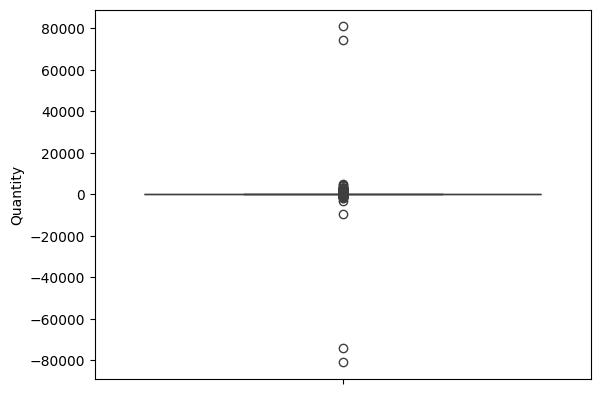

In [425]:
#Checking outliers in quanity:
sns.boxplot(data = df['Quantity'])

In [426]:
# Handling outliers:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers below the lower bound:
outliers_below_lower_bound = df[df['Quantity'] < lower_bound]

# Identifying outliers above the upper bound:
outliers_above_upper_bound = df[df['Quantity'] > upper_bound]

# Replacing outliers with the median:
df.loc[outliers_below_lower_bound.index, 'Quantity'] = df['Quantity'].median()
df.loc[outliers_above_upper_bound.index, 'Quantity'] = df['Quantity'].median()


<Axes: ylabel='Quantity'>

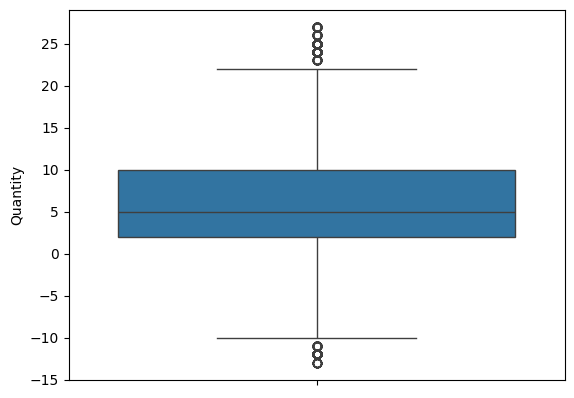

In [427]:
# Finding outliers after handling it in Quantity:
sns.boxplot(data = df['Quantity'])

<Axes: ylabel='UnitPrice'>

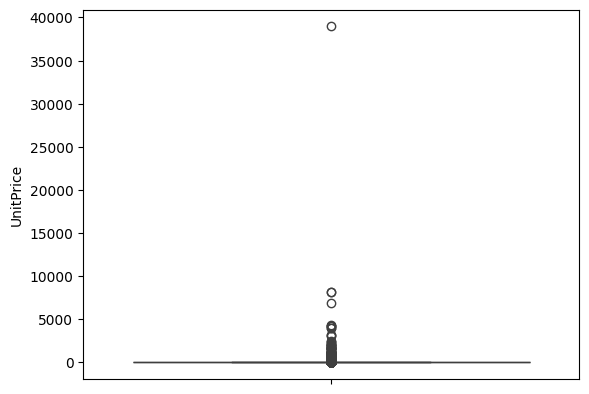

In [428]:
# Finding outliers in unitprice:
sns.boxplot( data = df['UnitPrice'])

In [429]:
# Handling outliers:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers below the lower bound:
outliers_below_lower_bound = df[df['UnitPrice'] < lower_bound]

# Identifying outliers above the upper bound:
outliers_above_upper_bound = df[df['UnitPrice'] > upper_bound]

# Replacing outliers with the median:
df.loc[outliers_below_lower_bound.index, 'UnitPrice'] = df['UnitPrice'].median()
df.loc[outliers_above_upper_bound.index, 'UnitPrice'] = df['UnitPrice'].median()

<Axes: ylabel='UnitPrice'>

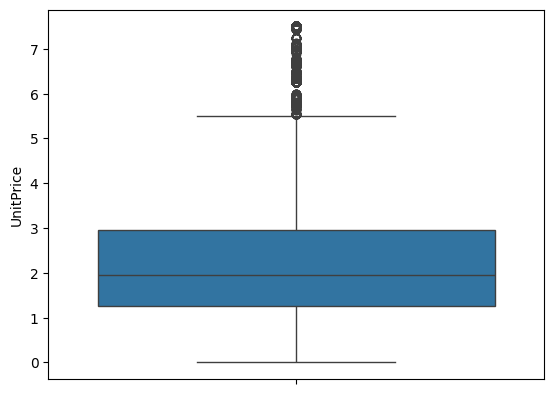

In [430]:
# Finding outliers after handling the outliers:
sns.boxplot(data = df['UnitPrice'])

<Axes: ylabel='TotalPrice'>

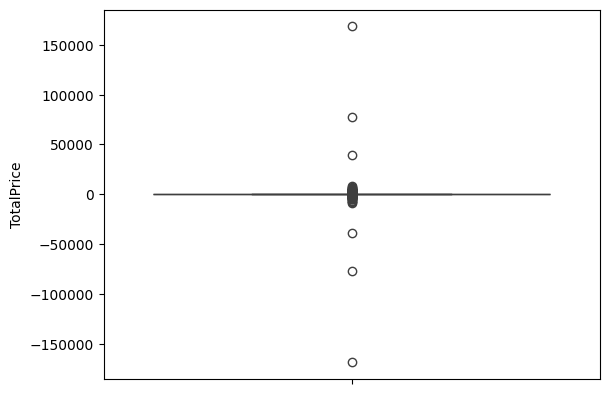

In [431]:
# Finding outliers in TotalPrice:
sns.boxplot(data = df['TotalPrice'])

In [432]:
# Handling outliers in TotalPrice:
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers below the lower bound:
outliers_below_lower_bound = df[df['TotalPrice'] < lower_bound]

# Identifying outliers above the upper bound:
outliers_above_upper_bound = df[df['TotalPrice'] > upper_bound]

# Replacing outliers with the median:
df.loc[outliers_below_lower_bound.index, 'TotalPrice'] = df['TotalPrice'].median()
df.loc[outliers_above_upper_bound.index, 'TotalPrice'] = df['TotalPrice'].median()

<Axes: ylabel='TotalPrice'>

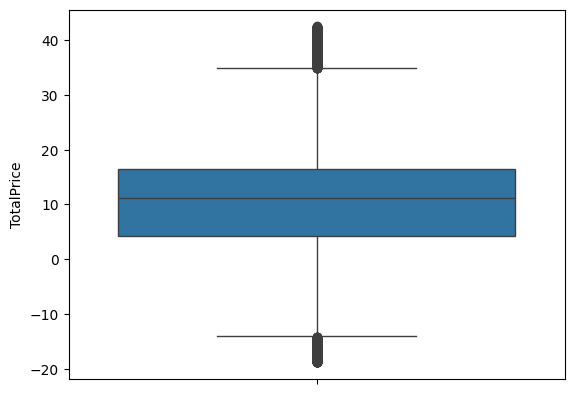

In [433]:
# Finding outliers in TotalPrice after handling outliers:
sns.boxplot(data = df['TotalPrice'])

In [434]:
#Printing data after handling outliers:
df.head(5)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [435]:
# Printing details and checking if outliers handled:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month
count,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000
mean,6.700457,2.125949,15287.795830,11.590708,2010.934003,7.605887
std,6.554789,1.469546,1713.573064,9.015713,0.248278,3.418936
min,-13.000000,0.001000,12346.000000,-18.750000,2010.000000,1.000000
25%,2.000000,1.250000,13954.000000,4.250000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,10.000000,2.950000,16791.000000,16.500000,2011.000000,11.000000
max,27.000000,7.500000,18287.000000,42.450000,2011.000000,12.000000


In [ ]:
#Printing customer counts in each country:
customer_counts = df['Country'].value_counts()
customer_counts


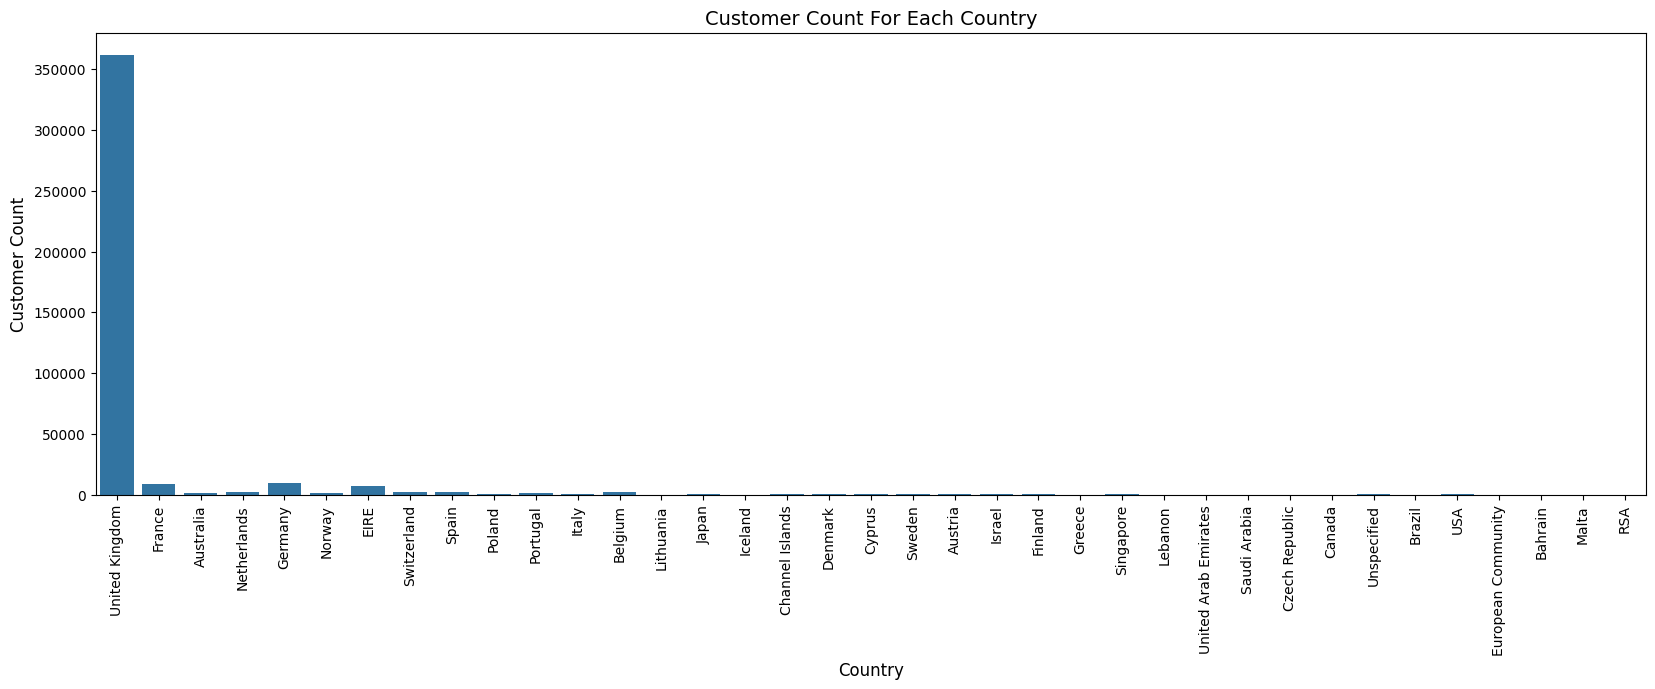

In [437]:
# Making Visualization of cumtomer count for each country:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'Country')
plt.title('Customer Count For Each Country', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Customer Count', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()


*Observation:*
* We can observe that majority of the customer data are from United Kingdom.

In [ ]:
# Total Sales From Each Country:
Total_Sales = df.groupby(['Country']).agg({'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False)
Total_Sales

In [439]:
#Making top10 country dataset:
df2 = Total_Sales.head(10)

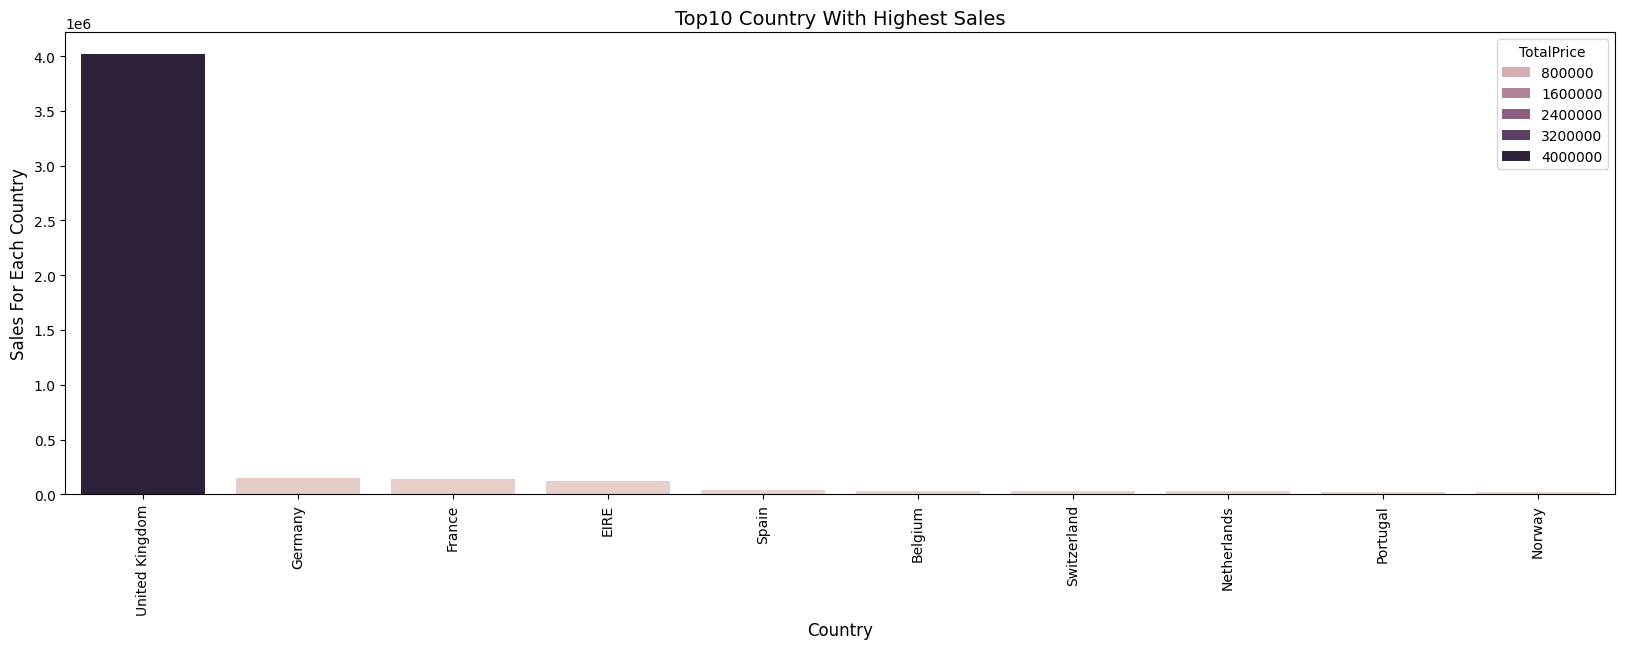

In [440]:
#Visualizing top10 country with highest sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = df2, x = 'Country', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Top10 Country With Highest Sales', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Sales For Each Country', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()


*Observation:*
* We can observe that majority of the sales are from United Kingdom.

In [441]:
#Making a dataframe for each year total sales:
Year_Sales = df.groupby('Year').agg({'TotalPrice':'sum'})

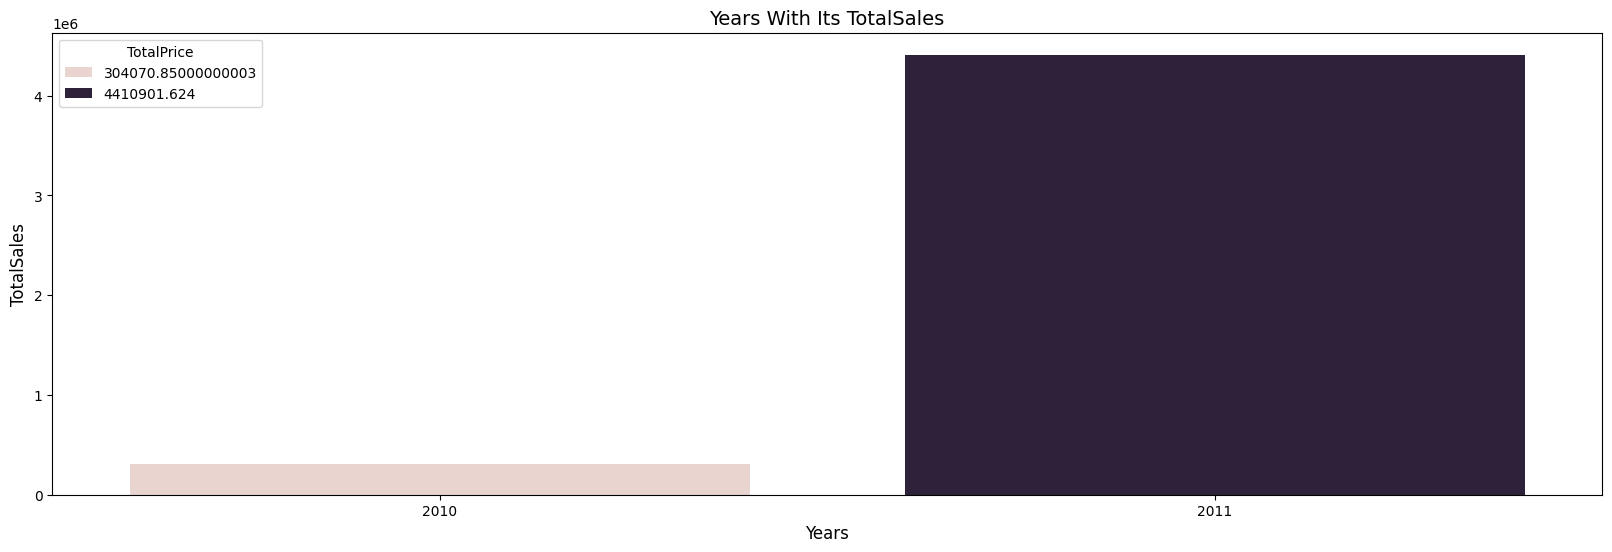

In [442]:
#Visualizing years with its sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = Year_Sales, x = 'Year', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Years With Its TotalSales', fontsize = 14)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('TotalSales', fontsize = 12)
plt.show()



*Observation:*
* Majority of the sales was in 2011.

In [443]:
# Making a dataframe for each month total sales:
Month_Sales = df.groupby('Month').agg({'TotalPrice':'sum'})

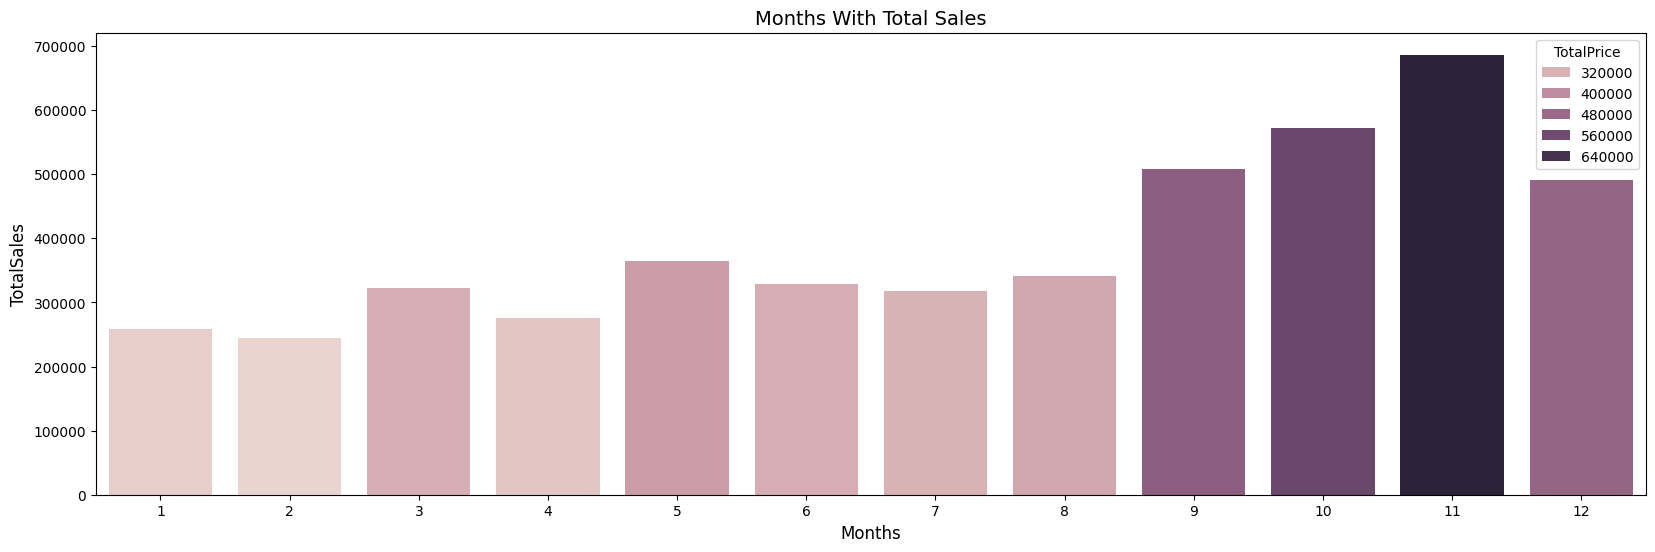

In [444]:
# Visualizing months with its total sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = Month_Sales, x = 'Month', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Months With Total Sales', fontsize = 14)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('TotalSales', fontsize = 12)
plt.show()

*Observation:*
* Majority of the sales are between September to December.
* November has the highest sales.

In [445]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [446]:
# Making a dataframe for stockcode with highest revenue:
Stock_Revenue = df.groupby(['StockCode', 'ProductName']).agg({'Quantity':'sum', 'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False)
df4 = Stock_Revenue.head(10)
df4

,,Quantity,TotalPrice
StockCode,ProductName,,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,12457,31705.36
22423,REGENCY CAKESTAND 3 TIER,7475,29967.31
85099B,JUMBO BAG RED RETROSPOT,13538,28044.74
47566,PARTY BUNTING,7655,26073.99
84879,ASSORTED COLOUR BIRD ORNAMENT,14891,25759.23
POST,POSTAGE,3002,20708.57
20725,LUNCH BAG RED RETROSPOT,10265,17328.95
23298,SPOTTY BUNTING,4947,16608.75
22457,NATURAL SLATE HEART CHALKBOARD,6128,16467.76


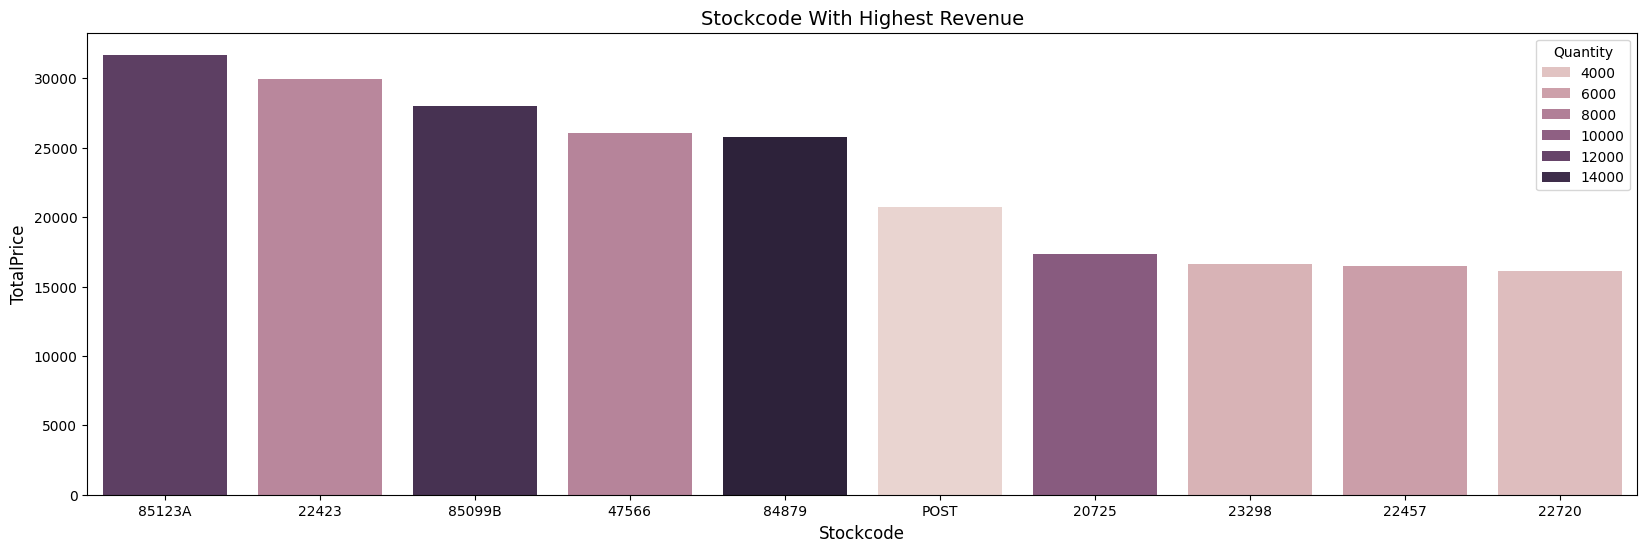

In [447]:
# Visualizing stockcode with highest revenue:
plt.figure(figsize = (20, 6))
sns.barplot(data = df4, x = 'StockCode', y = 'TotalPrice', hue = 'Quantity')
plt.title('Stockcode With Highest Revenue', fontsize = 14)
plt.xlabel('Stockcode', fontsize = 12)
plt.ylabel('TotalPrice', fontsize = 12)
plt.show()

*Observation:*
* The Stockcode 85123A has the highest total revenue.
* The Stockcode 84879 has the highest Quantity sold.

In [448]:
#Making a dataframe for top10 most regular customer:
Regular_Customer = df['CustomerID'].value_counts().reset_index()
Regular_Customer.columns = ['CustomerID', 'Frequency']

df5 = Regular_Customer.head(10)
df5

,CustomerID,Frequency
0,17841.0,7983
1,14911.0,5901
2,14096.0,5128
3,12748.0,4641
4,14606.0,2782
5,15311.0,2491
6,14646.0,2081
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


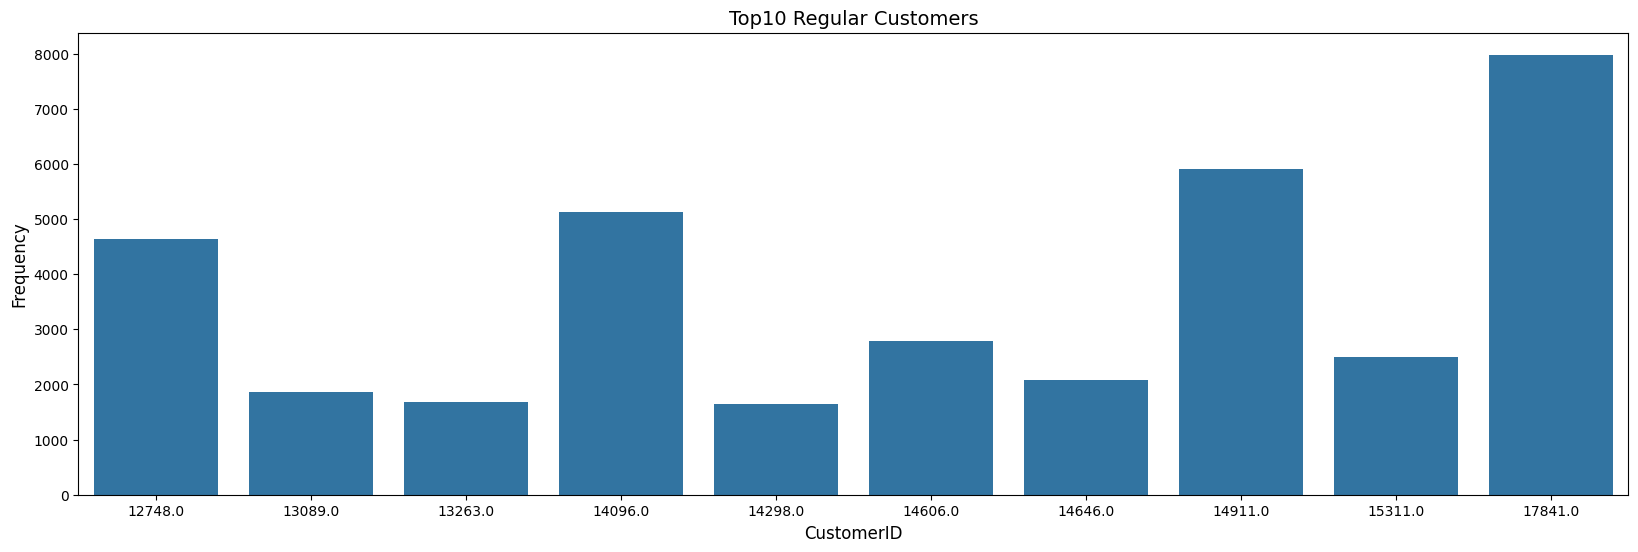

In [449]:
# Visualizing top10 regular customer:
plt.figure(figsize = (20, 6))
sns.barplot(data = df5, x = 'CustomerID', y = 'Frequency')
plt.title('Top10 Regular Customers', fontsize = 14)
plt.xlabel('CustomerID', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

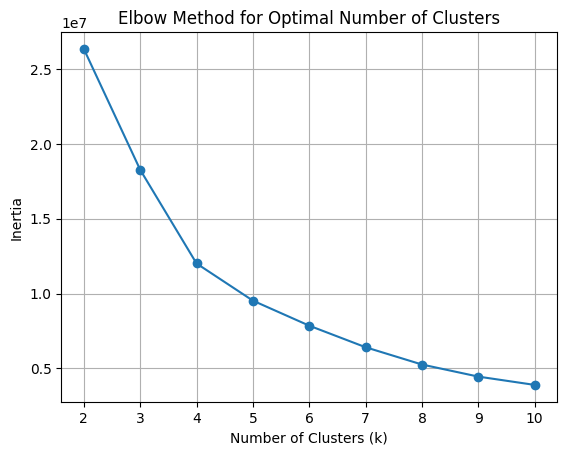

In [450]:
#Finding appropriate k for kmeans clusterring using elbow method:
#Importing necessary library for elbow method:
from sklearn.cluster import KMeans

# Defining the range of clusters to try:
k_values = range(2, 11)

X = df[['Quantity', 'TotalPrice']]

# Initializing a list to store inertias:
inertias = []

# Performing KMeans clustering for each value of k:
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Method:
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [451]:
#Importing necessary library for clusterring:
from sklearn.cluster import KMeans

# Selecting features for clustering
X = df[['Quantity', 'TotalPrice']]

# Initializing KMeans with appropriate number of cluster as per elbow method graph:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init = 10, random_state=0)

# Fitting KMeans to the data:
kmeans.fit(X)

# Making a cluster column:
df.loc[:, ('Cluster')] = kmeans.labels_

# Displaying the clusters
print(df[['Quantity', 'TotalPrice', 'Cluster']].head())

   Quantity  TotalPrice  Cluster
0         6       15.30        1
1         6       20.34        1
2         8       22.00        1
3         6       20.34        1
4         6       20.34        1


In [452]:
#Printing dataset with cluster column:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [453]:
#Printing unique value in cluster column:
df['Cluster'].unique()

array([1, 2, 3, 0], dtype=int32)

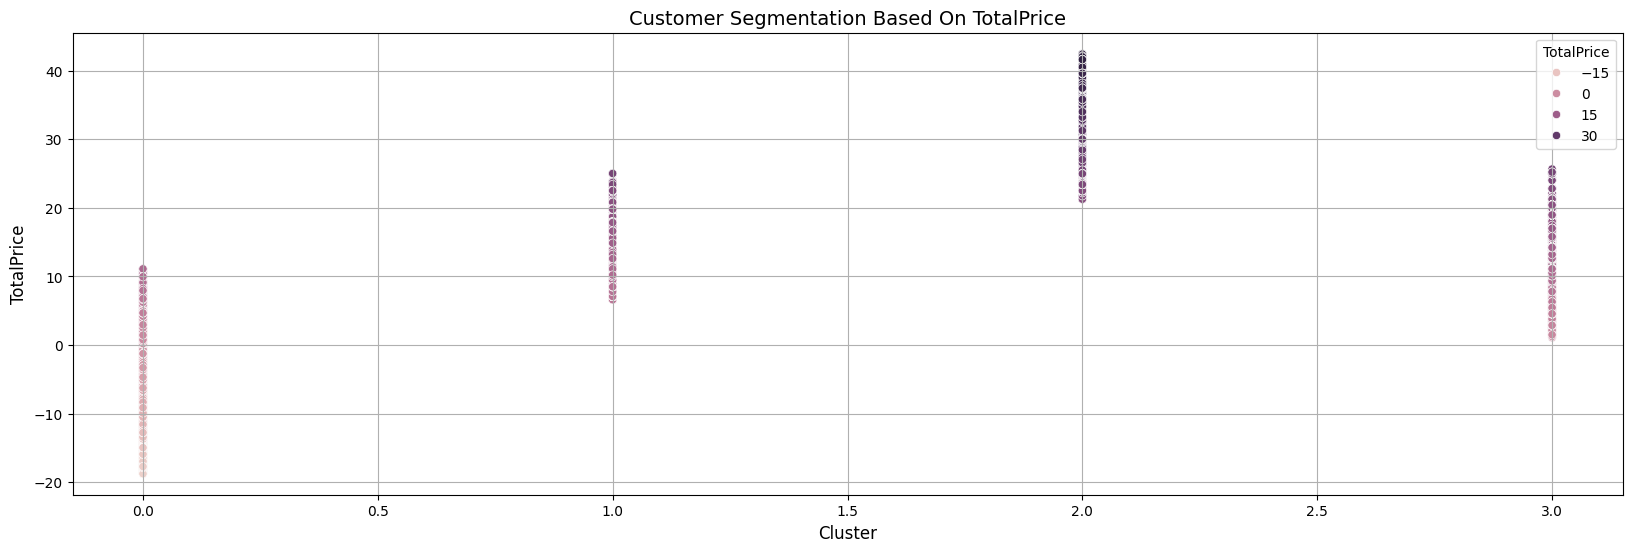

In [454]:
#Visualizing Clusters:
plt.figure(figsize = (20, 6))
sns.scatterplot(data = df, x = 'Cluster' , y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Customer Segmentation Based On TotalPrice', fontsize = 14)
plt.xlabel('Cluster', fontsize = 12)
plt.ylabel('TotalPrice', fontsize = 12)
plt.grid(True)
plt.show()

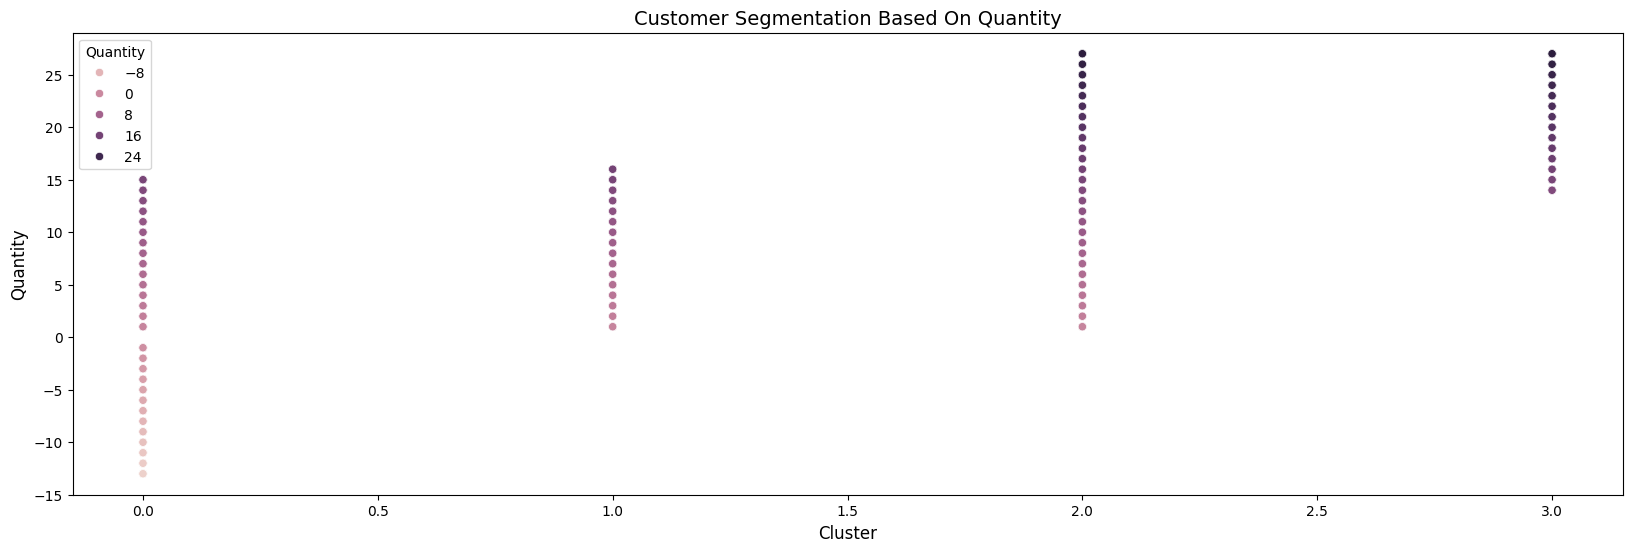

In [455]:
# Visualizing clusters of customers based on quantity of purchase:
plt.figure(figsize = (20, 6))
sns.scatterplot(data = df, x = 'Cluster' , y = 'Quantity', hue = 'Quantity')
plt.title('Customer Segmentation Based On Quantity', fontsize = 14)
plt.xlabel('Cluster', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.show()

In [456]:
# Making dataframe to visualize customer count in each cluster:
df_customer_count = df['Cluster'].value_counts()
df_customer_count

1    170574
0    167338
2     40423
3     28454
Name: Cluster, dtype: int64

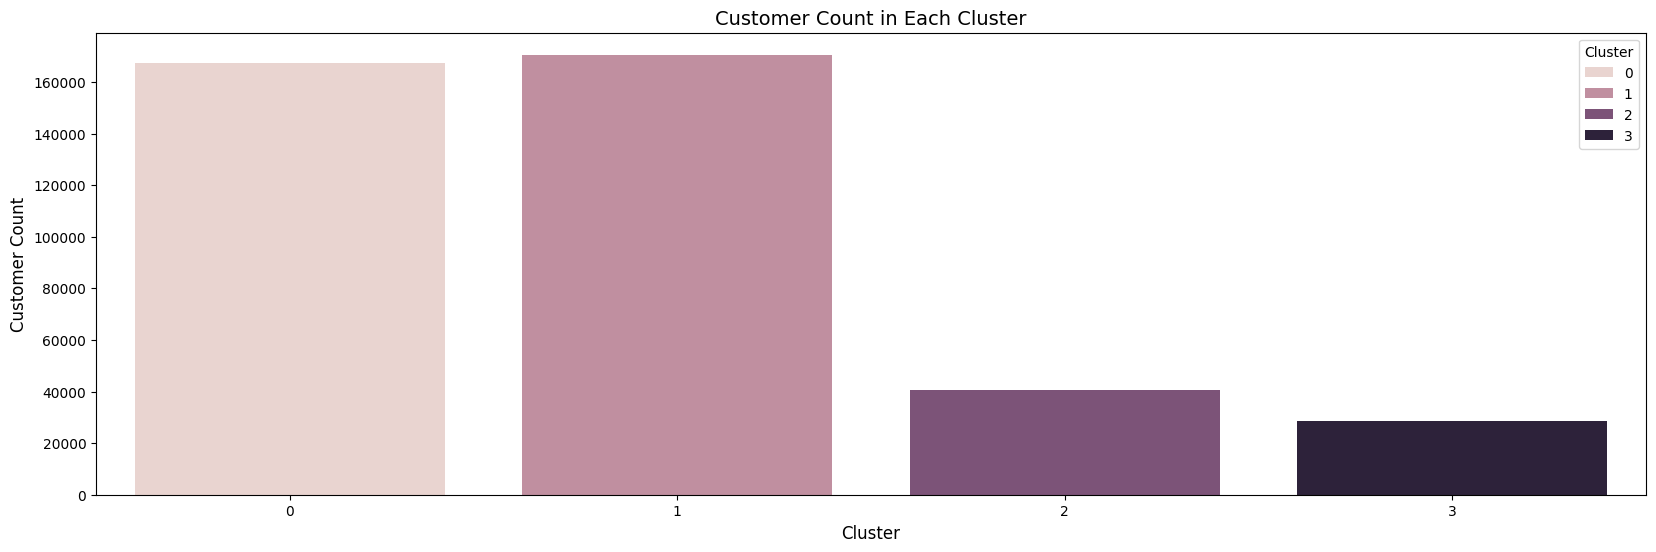

In [457]:
#Visualizing number of customers in each cluster:
plt.figure(figsize=(20, 6))
sns.countplot(data = df, x='Cluster', hue='Cluster')
plt.title('Customer Count in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.show()


In [458]:
# Making dataset for sum of totalprice of each cluster:
cluster_total_revenue = df.groupby('Cluster').agg(TotalRevenue=('TotalPrice', 'sum')).reset_index()

cluster_total_revenue

,Cluster,TotalRevenue
0,0,609755.224
1,1,2530849.300
2,2,1240138.220
3,3,334229.730


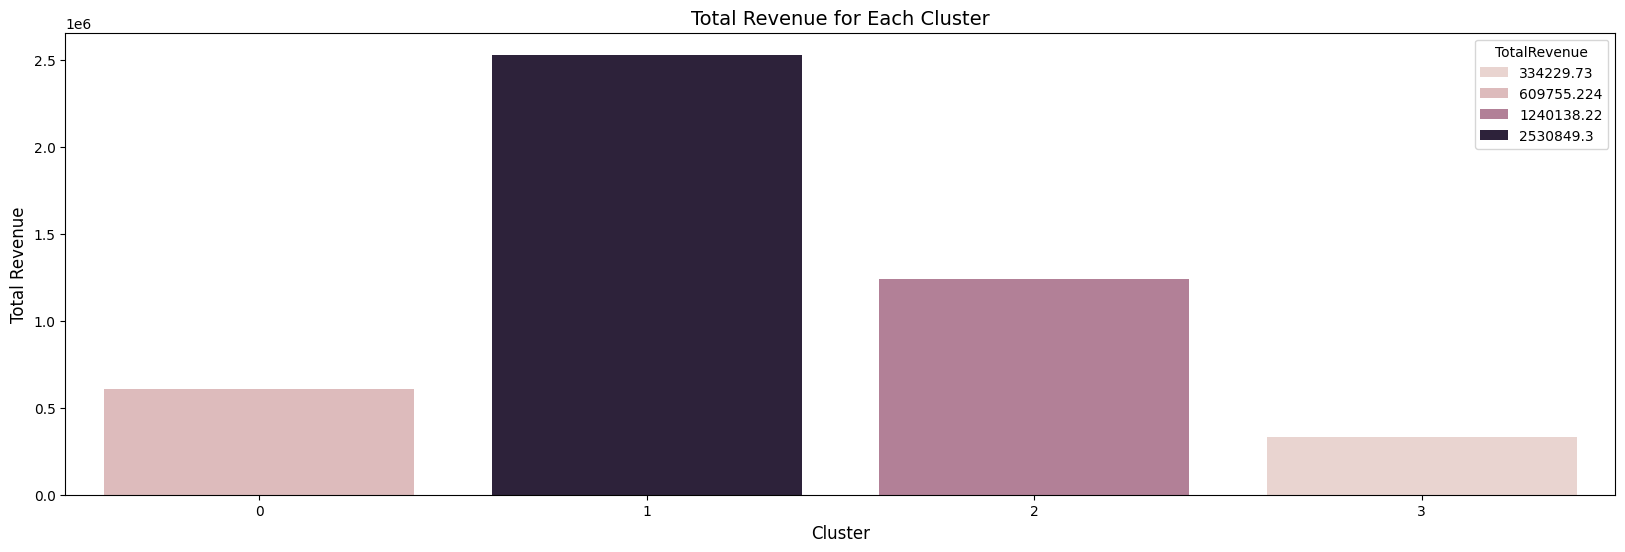

In [459]:
# Visualizing the barplot of totalprice:
plt.figure(figsize=(20, 6))
sns.barplot(data=cluster_total_revenue, x='Cluster', y='TotalRevenue', hue = 'TotalRevenue')
plt.title('Total Revenue for Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()


In [460]:
# Making dataset for Quantity of each cluster:
cluster_total_quantity = df.groupby('Cluster').agg(TotalQuantity = ('Quantity', 'sum')).reset_index()
cluster_total_quantity

,Cluster,TotalQuantity
0,0,409110
1,1,1201234
2,2,463513
3,3,651815


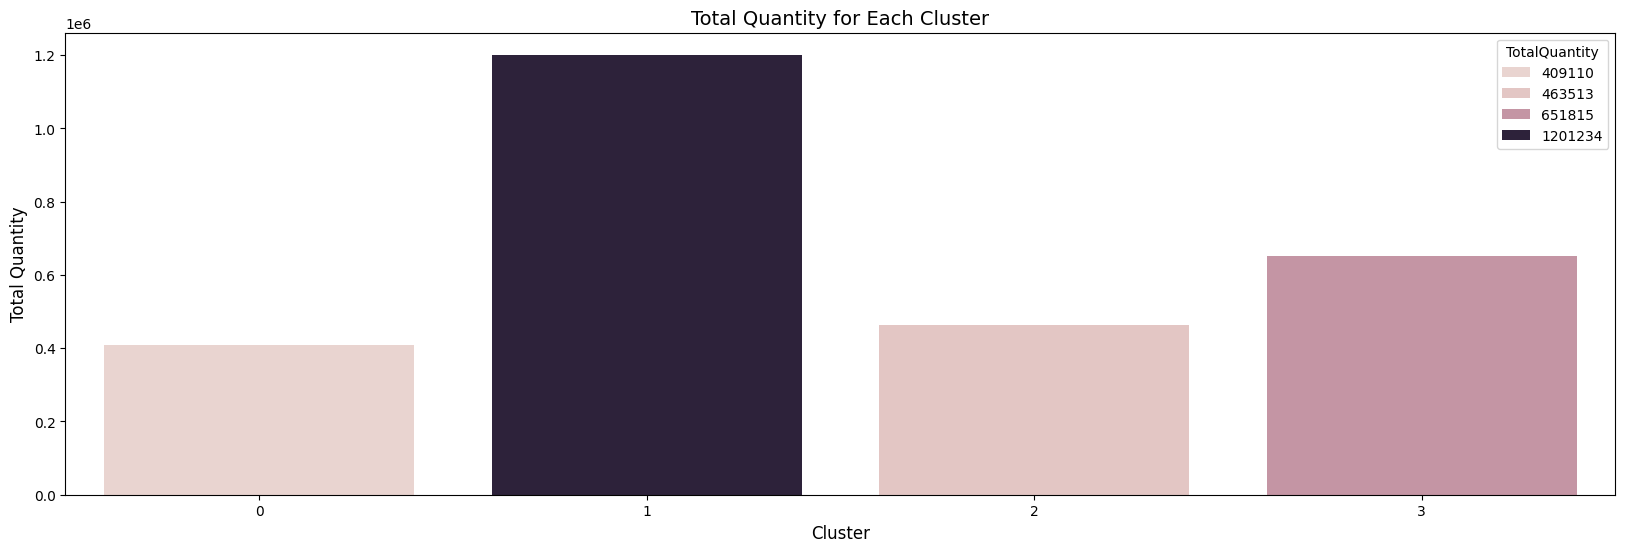

In [461]:
# Visualizing the barplot of totalquantity:
plt.figure(figsize=(20, 6))
sns.barplot(data=cluster_total_quantity , x = 'Cluster', y = 'TotalQuantity', hue = 'TotalQuantity')
plt.title('Total Quantity for Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.show()

In [ ]:
# Ploting pairplot:
sns.pairplot(data = df )

In [463]:
# Making the DataFrame by 'Cluster' and calculate the minimum and maximum values for each numeric column:
cluster_stats = df.groupby('Cluster').agg({
    'TotalPrice': ['min', 'max'],
    'Quantity': ['min', 'max'],
    'UnitPrice': ['min', 'max']
}).reset_index()

# Creating a new DataFrame to store the 2D matrix:
matrix_data = {
    'Cluster': cluster_stats['Cluster'],
    'MinTotalPrice': cluster_stats[('TotalPrice', 'min')],
    'MaxTotalPrice': cluster_stats[('TotalPrice', 'max')],
    'MinQuantity': cluster_stats[('Quantity', 'min')],
    'MaxQuantity': cluster_stats[('Quantity', 'max')],
    'MinUnitPrice': cluster_stats[('UnitPrice', 'min')],
    'MaxUnitPrice': cluster_stats[('UnitPrice', 'max')]
}

cluster_matrix = pd.DataFrame(matrix_data)

cluster_matrix

,Cluster,MinTotalPrice,MaxTotalPrice,MinQuantity,MaxQuantity,MinUnitPrice,MaxUnitPrice
0,0,-18.75,11.10,-13,15,0.001,7.5
1,1,6.60,25.00,1,16,0.030,7.5
2,2,21.25,42.45,1,27,0.040,7.5
3,3,1.08,25.65,14,27,0.060,7.5


*Observations:*
* Most of the sales were in 2011.
* Most of the sales occur between September to December.
* Stock code 85123A has the highest Total sales value.
* Stock code 84879 has the highest quantity sold.
* CustomerID 17841 has the most purchases.
* The suitable number of k for kmeans is 4 according to the elbow method graph.
* Cluster 1 has the most customers, i.e., 170574, followed by cluster 0 with 167338 customers.
* Cluster 1 has the highest total sales of 2530849.300, followed by cluster 2 with total sales of 1240138.220.
* Cluster 1 has the most quantity sold, i.e., 1201234, followed by cluster 3 with 651815 quantity sold.


*Conclusion:*
* Customers in cluster 1 is most important.
* Customers in cluster 1 is giving most orders.
* Customers in cluster 1 is giving highest total sales of 2530849.300.
* Customers in cluster 2 is second most valuable.
* Customers in cluster 2 is giving second highest total sales of 1240138.220.
